In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import glob

In [2]:
fpath = "/scratch/indikar_root/indikar1/shared_data/single_cell/reports/single_cell/duplication_report.csv"
df = pd.read_csv(fpath)
print(f"{df.shape=}")
df['sample'] = df["basename"].str[:2]
df['cell'] = df["basename"].str[2:5]
df.head()

df.shape=(380, 4)


,basename,total_reads,unique_reads,duplication_rate,sample,cell
0,o4b03.GRCm39.dupes.parquet,17,17,0.000000,o4,b03
1,o4b02.GRCm39.dupes.parquet,325,300,0.076923,o4,b02
2,o4b08.GRCm39.dupes.parquet,99,98,0.010101,o4,b08
3,o4b06.GRCm39.dupes.parquet,58,58,0.000000,o4,b06
4,o4b01.GRCm39.dupes.parquet,133,132,0.007519,o4,b01


In [3]:
gx = df.groupby('sample').agg(
    total_reads = ('total_reads', 'sum'),
    unique_reads = ('unique_reads', 'sum'),
    average_duplication = ('duplication_rate', 'mean'),
).reset_index()

print(gx.round(3).astype(str).to_latex(index=False))

\begin{tabular}{llll}
\toprule
sample & total_reads & unique_reads & average_duplication \\
\midrule
o1 & 22869755 & 949206 & 0.838 \\
o2 & 439751 & 51661 & 0.523 \\
o3 & 7189137 & 406248 & 0.86 \\
o4 & 5762381 & 754963 & 0.552 \\
\bottomrule
\end{tabular}



In [7]:
df = df.sort_values(by='unique_reads', ascending=False)
df.tail(20)

,basename,total_reads,unique_reads,duplication_rate,sample,cell
334,o2b64.GRCm39.dupes.parquet,49,48,0.020408,o2,b64
275,o2b03.GRCm39.dupes.parquet,59,46,0.220339,o2,b03
47,o4b55.GRCm39.dupes.parquet,45,45,0.000000,o4,b55
5,o4b12.GRCm39.dupes.parquet,41,40,0.024390,o4,b12
329,o2b60.GRCm39.dupes.parquet,40,39,0.025000,o2,b60
315,o2b38.GRCm39.dupes.parquet,47,39,0.170213,o2,b38
362,o2b93.GRCm39.dupes.parquet,33,33,0.000000,o2,b93
336,o2b66.GRCm39.dupes.parquet,30,30,0.000000,o2,b66
24,o4b32.GRCm39.dupes.parquet,28,27,0.035714,o4,b32
50,o4b58.GRCm39.dupes.parquet,26,26,0.000000,o4,b58


<Axes: xlabel='unique_reads', ylabel='Density'>

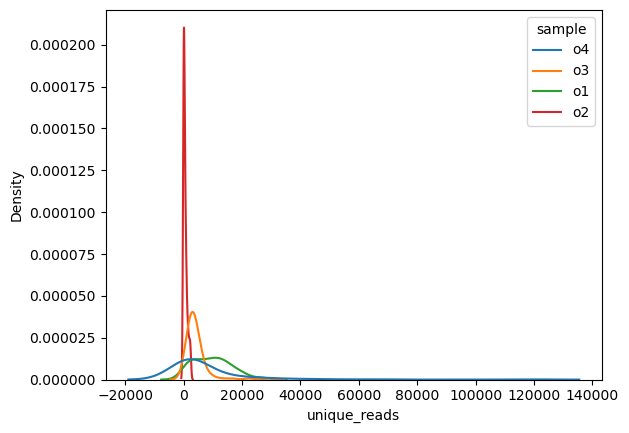

In [9]:
sns.kdeplot(data=df, 
            x='unique_reads',
            hue='sample')

In [10]:
20000*96

1920000

In [17]:
(df['unique_reads'] > 10000).sum() / len(df)

0.17894736842105263

In [18]:
68 / 380

0.17894736842105263

In [20]:
dpath = "/scratch/indikar_root/indikar1/shared_data/single_cell/single_cell/duplication_reports/"
file_list = glob.glob(f"{dpath}*")
file_list[:10]

['/scratch/indikar_root/indikar1/shared_data/single_cell/single_cell/duplication_reports/o3b66.GRCm39.dupes.parquet',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/single_cell/duplication_reports/o2b65.GRCm39.dupes.parquet',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/single_cell/duplication_reports/o1b78.GRCm39.dupes.parquet',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/single_cell/duplication_reports/o4b09.GRCm39.dupes.parquet',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/single_cell/duplication_reports/o4b84.GRCm39.dupes.parquet',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/single_cell/duplication_reports/o4b70.GRCm39.dupes.parquet',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/single_cell/duplication_reports/o4b29.GRCm39.dupes.parquet',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/single_cell/duplication_reports/o4b49.GRCm39.dupes.parquet',
 '/scratch/indikar_root/indikar1/shared_data/single_cell

In [33]:

res = []

for fpath in file_list:
    basename = os.path.basename(fpath)
    sample = basename[:2]
    cell = basename[2:5]
    tmp = pd.read_parquet(fpath)
    
    row = {
        'sample' : sample,
        'cell' : cell,
        'reads' : len(tmp),
        'unique' : tmp['unique'].sum(),
        'unique_percent' : tmp['unique'].sum() / len(tmp),
    }
    res.append(row)
    
    
res = pd.DataFrame(res)
res.head()

,sample,cell,reads,unique,unique_percent
0,o3,b66,42014,3320,0.079021
1,o2,b65,13655,1231,0.090150
2,o1,b78,149286,8941,0.059892
3,o4,b09,4774,1050,0.219941
4,o4,b84,208267,29934,0.143729


Text(0, 0.5, '% Unique')

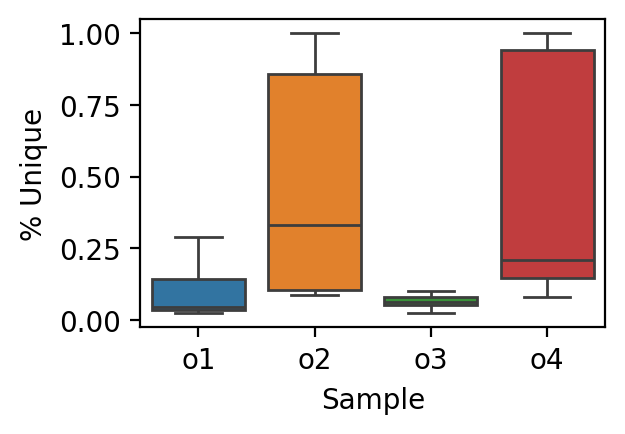

In [51]:
res = res.sort_values(by='sample')

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 3, 2


sns.boxplot(data=res, 
            x='sample',
            y='unique_percent',
            hue='sample',
            showfliers=False,
            )

plt.xlabel('Sample')
plt.ylabel('% Unique')

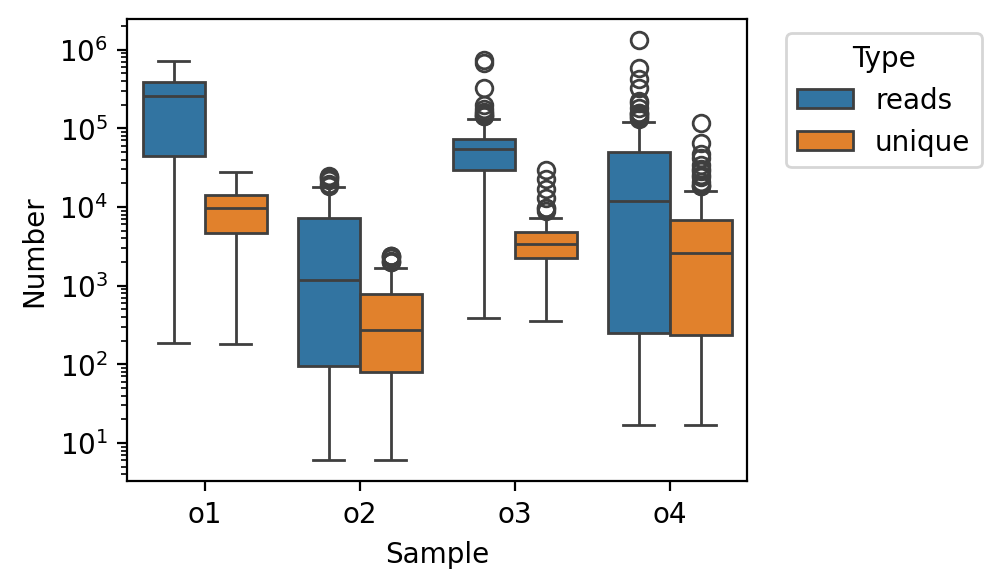

In [58]:
pdf = res.copy()
pdf = pd.melt(pdf, id_vars=['sample', 'cell'],
              value_vars=['reads', 'unique'])


plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 4, 3

sns.boxplot(data=pdf, 
            x='sample',
            y='value',
            hue='variable')

plt.xlabel('Sample')
plt.ylabel('Number')
plt.yscale('log')
sns.move_legend(plt.gca(), 
                loc='upper right',
                title='Type',
                bbox_to_anchor=(1.4, 1))

In [47]:
(10 ** 4) * 96

960000

In [49]:
tmp = tmp.sort_values(by='near_duplicate_group')
tmp.head(25)

,read_name,mapq,order,exact_duplicate_group,fragments,near_duplicate_group,unique
29308,e2e1d4b9-a894-43e6-aff2-4a97b47d35f0,51.894737,18,1831,1402;1403;152;2267;2268;267;2722;2723;2725;272...,0,False
8398,40a526ca-317f-46ba-a46a-7cdd890e5f32,50.100000,19,1821,1402;1403;152;2267;2268;267;2722;2723;2725;272...,0,False
5876,2d77e489-90a6-44bc-b3c8-2eaa2b588db2,49.550000,19,1821,1402;1403;152;2267;2268;267;2722;2723;2725;272...,0,False
5878,2d7aebc4-ef0d-4d41-a841-4a3e5cef47fc,46.571429,19,1821,1402;1403;152;2267;2268;267;2722;2723;2725;272...,0,False
18897,921799e9-b793-4fb3-86e7-e7f1f1470f33,54.529412,16,1827,1402;1403;152;2267;2268;267;2722;2723;2725;272...,0,False
23672,b7285dfb-3800-4da2-a575-300b21b8e7c4,53.111111,17,1828,1402;1403;152;2267;2268;267;2722;2723;2725;272...,0,False
23674,b7309adf-bdfd-4219-828a-9e353b95b362,49.000000,18,1818,1402;1403;152;2267;2268;267;2722;2723;2725;272...,0,False
17186,849ea869-427e-4ee3-a516-3da1fc96b743,50.062500,15,1901,1402;1403;152;267;2722;2723;2725;2726;2727;272...,0,False
1451,0bb88e42-289f-490f-bcc5-0e6983386d7a,52.105263,18,1870,1402;1403;152;2268;2388;267;2722;2723;2725;272...,0,False
1452,0bb8f08d-fc38-4e25-809d-68a3daf9fb56,49.578947,19,1819,1402;1403;152;2267;2268;267;2722;2723;2725;272...,0,False


,read_name,mapq,order,exact_duplicate_group,fragments,near_duplicate_group,unique
58,50bf59da-3b1b-49bb-9cc3-81e1e897ea65_1,55.285714,7,81,215;257;27;28;327;392;604,0,True
12,12041fce-d9f7-4082-a4f5-8b18cb728faf,49.600000,5,82,215;257;27;28;392,0,False
14,19addf84-74be-41d3-9d4b-7a6d10ae619d_1,52.200000,5,48,169;553;554;555;556,1,True
177,faa56997-1330-4442-9f3c-8eb219b94aa0,48.000000,5,48,169;553;554;555;556,1,False
180,fb9f9cfb-435c-427a-8e56-4513e059d98f,60.000000,1,171,623,2,False
46,3ae79dbe-8afe-4288-a634-ab8c7b60c80a,60.000000,1,171,623,2,True
76,70256a4d-e67e-468c-a166-134d5b50860c_1,59.125000,8,122,347;357;358;359;360;361;564;565,3,False
77,70256a4d-e67e-468c-a166-134d5b50860c_2,60.000000,8,122,347;357;358;359;360;361;564;565,3,True
0,0158e151-11aa-4e3e-a6dd-a5569c9d3395,35.142857,7,16,11;12;15;220;348;598;92,4,True
1,0289fa3b-a1f2-4e85-b31f-61c932c1a860,0.000000,1,174,627,5,True
